# MoodSync
#### Realtime Emotion Monitoring with Deep Learning (With Picture Only)

In [2]:

from keras.utils import to_categorical  # Utilize one-hot encoding for target labels.
from tensorflow.keras.preprocessing.image import load_img  # Load images for preprocessing.
from keras.models import Sequential  # Initialize a sequential model.
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D  # Define layers for the neural network.
from PIL import Image  # Import the Python Imaging Library for image operations.
import os  # Access and manipulate the file system.
import pandas as pd  # Work with data in tabular form.
import numpy as np  # Perform numerical operations.


### Define directory paths for training and testing data.


In [3]:
TRAIN_dir='train'
TEST_dir='test'

### Define a function to create a DataFrame from image files in a directory.

In [4]:
def createDF(dir):
    image_paths = []  # Store the paths of image files.
    labels = []  # Store corresponding labels.

    # Loop through each subdirectory (label) in the given directory.
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))  # Store the image file path.
            labels.append(label)  # Store the label associated with the image.

        print(label, "completed")  # Print progress for each label.
    
    return image_paths, labels


### Create a DataFrame named 'train' to store image paths and labels.

In [5]:
train = pd.DataFrame()

# Populate the 'train' DataFrame using the 'createDF' function.
train['image'], train['label'] = createDF(TRAIN_dir)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
train

,image,label
0,train\angry\0.jpg,angry
1,train\angry\1.jpg,angry
2,train\angry\10.jpg,angry
3,train\angry\10002.jpg,angry
4,train\angry\10016.jpg,angry
...,...,...
28816,train\surprise\9969.jpg,surprise
28817,train\surprise\9985.jpg,surprise
28818,train\surprise\9990.jpg,surprise
28819,train\surprise\9992.jpg,surprise


### Create a DataFrame named 'test' to store image paths and labels.


In [7]:
test = pd.DataFrame()

# Populate the 'test' DataFrame using the 'createDF' function.
test['image'], test['label'] = createDF(TEST_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
test

,image,label
0,test\angry\10052.jpg,angry
1,test\angry\10065.jpg,angry
2,test\angry\10079.jpg,angry
3,test\angry\10095.jpg,angry
4,test\angry\10121.jpg,angry
...,...,...
7061,test\surprise\9806.jpg,surprise
7062,test\surprise\9830.jpg,surprise
7063,test\surprise\9853.jpg,surprise
7064,test\surprise\9878.jpg,surprise


### Import the 'tqdm' library to display progress bars in notebooks.

In [9]:
from tqdm.notebook import tqdm

### Define a function to extract image features.

In [15]:

def extract_features(images):
    features = []  # Initialize a list to store features.
    
    for image in tqdm(images):  # Iterate through the list of images with a progress bar.
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)  # Convert the image to a NumPy array.
        features.append(img)  # Append the image to the features list.
    
    features = np.array(features)  # Convert the features list to a NumPy array.
    features = features.reshape(len(features), 48, 48, 1)  # Reshape the features array.
    
    return features  # Return the extracted features.

    

### Extract features from the 'train' DataFrame's 'image' column.

In [16]:
import jupyter
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

### Extract features from the 'test' DataFrame's 'image' column.

In [17]:
test_features = extract_features(test['image']) 

  0%|          | 0/7066 [00:00<?, ?it/s]

### Normalize the pixel values of the training and test features.

In [18]:
x_train = train_features/255.0
x_test = test_features/255.0

### Import the 'LabelEncoder' class from the 'sklearn.preprocessing' module.

In [20]:
from sklearn.preprocessing import LabelEncoder

### Create a LabelEncoder instance and fit it to the labels in the 'train' DataFrame.

In [21]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

### Transform the categorical labels in the 'train' and 'test' DataFrames to numerical values.

In [22]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

### Convert the numerical labels to one-hot encoded format.

In [23]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

### Create a Sequential model for deep learning.

In [24]:
# Create a Sequential model for deep learning.
model = Sequential()

# Add convolutional layers with max-pooling and dropout.
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten the output for fully connected layers.
model.add(Flatten())

# Add fully connected layers with dropout.
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Add the output layer with softmax activation for classification.
model.add(Dense(7, activation='softmax'))


c:\Users\kaush\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the neural network model.

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### Train the model on the training data.

In [27]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 191s 836ms/step - accuracy: 0.2290 - loss: 1.8414 - val_accuracy: 0.2583 - val_loss: 1.8062
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 200s 887ms/step - accuracy: 0.2457 - loss: 1.8128 - val_accuracy: 0.2577 - val_loss: 1.7738
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 192s 850ms/step - accuracy: 0.2658 - loss: 1.7578 - val_accuracy: 0.3228 - val_loss: 1.6685
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 171s 758ms/step - accuracy: 0.3242 - loss: 1.6690 - val_accuracy: 0.4270 - val_loss: 1.4959
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 178s 789ms/step - accuracy: 0.3915 - loss: 1.5518 - val_accuracy: 0.4560 - val_loss: 1.4005
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 177s 785ms/step - accuracy: 0.4217 - loss: 1.4859 - val_accuracy: 0.4877 - val_loss: 1.3439
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 179s 791ms/step - accuracy: 0.4545 - loss: 1.4234 - val_accuracy: 0.5106 - val_loss: 1.2975
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 177s 785ms/step - accuracy: 

### Serialize the model architecture to JSON and save it to a file.

In [28]:
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)

# Save the model's weights and other parameters to an HDF5 file.
model.save("emotiondetector.h5")


### Import the function to load a model from JSON in Keras.

In [34]:
from keras.models import Sequential, model_from_json

### Load the model architecture from a JSON file.

In [42]:
from keras.models import Sequential, model_from_json

# Load model architecture from JSON file
with open('facialemotionmodel.json', 'r') as json_file:
    model_json = json_file.read()

# Pass Sequential as a custom object in case it's not recognized
model = model_from_json(model_json, custom_objects={'Sequential': Sequential})

# Load weights into the model
model.load_weights("facialemotionmodel.h5")


### Define a list of emotion labels corresponding to the model's output classes.

In [44]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

### Define a function to extract features from a single image file.


In [46]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

def ef(image):
    # Load the image in grayscale mode (1 channel)
    img = load_img(image, color_mode='grayscale', target_size=(48, 48))  # Ensure the image is resized to (48, 48)
    
    # Convert the image to a NumPy array
    feature = img_to_array(img)
    
    # Reshape the feature to match the model's expected input shape (batch_size, height, width, channels)
    feature = feature.reshape(1, 48, 48, 1)
    
    # Normalize the pixel values (optional but common)
    feature = feature / 255.0  # Normalize to range [0, 1]
    
    return feature


In [47]:
# Define the path to the image file.
image = 'train/sad/42.jpg'

# Print the original emotion label.
print("Original image is of sad")

# Extract features from the image using the 'ef' function.
img = ef(image)

# Make a prediction using the trained model.
pred = model.predict(img)

# Get the predicted emotion label from the 'label' list.
pred_label = label[pred.argmax()]

# Print the model's prediction.
print("Model prediction is", pred_label)


Original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Model prediction is sad


### Import the 'matplotlib' library for plotting and display in a Jupyter notebook.

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

Original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Model prediction is sad


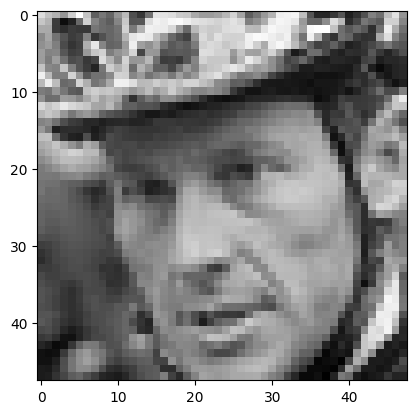

In [50]:
# Define the path to the image file.
image = 'train/sad/19.jpg'

# Print the original emotion label.
print("Original image is of sad")

# Extract features from the image using the 'ef' function.
img = ef(image)

# Make a prediction using the trained model.
pred = model.predict(img)

# Get the predicted emotion label from the 'label' list.
pred_label = label[pred.argmax()]

# Print the model's prediction.
print("Model prediction is", pred_label)

# Display the image using matplotlib.
plt.imshow(img.reshape(48, 48), cmap='gray')


Original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Model prediction is fear


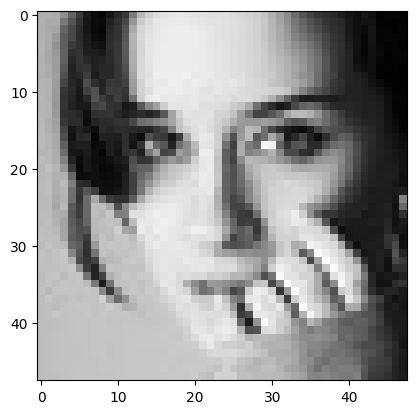

In [51]:
# Define the path to the image file.
image = 'train/fear/288.jpg'

# Print the original emotion label.
print("Original image is of fear")

# Extract features from the image using the 'ef' function.
img = ef(image)

# Make a prediction using the trained model.
pred = model.predict(img)

# Get the predicted emotion label from the 'label' list.
pred_label = label[pred.argmax()]

# Print the model's prediction.
print("Model prediction is", pred_label)

# Display the image using matplotlib.
plt.imshow(img.reshape(48, 48), cmap='gray')


Original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Model prediction is disgust


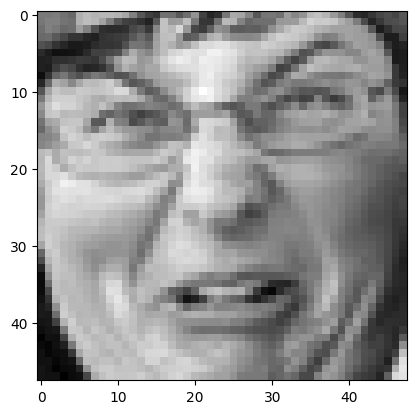

In [52]:
# Define the path to the image file.
image = 'train/disgust/299.jpg'

# Print the original emotion label.
print("Original image is of disgust")

# Extract features from the image using the 'ef' function.
img = ef(image)

# Make a prediction using the trained model.
pred = model.predict(img)

# Get the predicted emotion label from the 'label' list.
pred_label = label[pred.argmax()]

# Print the model's prediction.
print("Model prediction is", pred_label)

# Display the image using matplotlib.
plt.imshow(img.reshape(48, 48), cmap='gray')


Original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Model prediction is happy


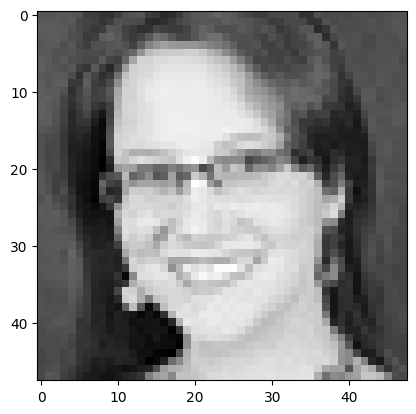

In [53]:
# Define the path to the image file.
image = 'train/happy/7.jpg'

# Print the original emotion label.
print("Original image is of happy")

# Extract features from the image using the 'ef' function.
img = ef(image)

# Make a prediction using the trained model.
pred = model.predict(img)

# Get the predicted emotion label from the 'label' list.
pred_label = label[pred.argmax()]

# Print the model's prediction.
print("Model prediction is", pred_label)

# Display the image using matplotlib.
plt.imshow(img.reshape(48, 48), cmap='gray')


Original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Model prediction is surprise


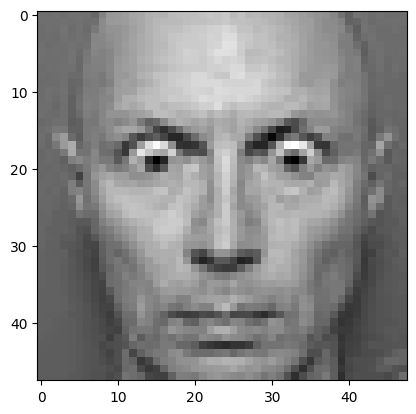

In [54]:
# Define the path to the image file.
image = 'train/surprise/15.jpg'

# Print the original emotion label.
print("Original image is of surprise")

# Extract features from the image using the 'ef' function.
img = ef(image)

# Make a prediction using the trained model.
pred = model.predict(img)

# Get the predicted emotion label from the 'label' list.
pred_label = label[pred.argmax()]

# Print the model's prediction.
print("Model prediction is", pred_label)

# Display the image using matplotlib.
plt.imshow(img.reshape(48, 48), cmap='gray')
